# Introduction

As a pharmacist who has seen up close the effects of heart disease, I greatly value the importance of taking care of one's heath and doing the most to prevent developing heart disease.

First of all, what is heart disease? The term “heart disease” refers to several types of heart conditions. The most common type of heart disease in the United States is coronary artery disease (CAD), which affects the blood flow to the heart and can present itself as angina or a heart attack.

According to the CDC, heart disease is a leading cause of death in the US. About half of all Americans have at least 1 major risk factor for heart disease. There are numerous key indicators that have varying levels of impact on the likelihood of developing heart disease. Identifying and preventing the factors that have the greatest impact is hugely important in healthcare.
I firmly believe that non-medicinal preventative methods can do as much as preventative medicine for mitigating heart disease risk. Lifestyle choices such as eating healthier foods, getting more physical activity, smoking less are choices that every adult can make daily to prevent their likelihood of heart disease and it is important to recognize which choices are most important.

We can greatly improve the US healthcare system, reduce healthcare costs, lower prevalence of heart disease in the country if more people were aware of key indicators of heart disease and ways to minimize their risks. For my final project I decided to investigate risk factors for developing heart disease.

The hypotheses that I will be working with througout this analysis are:
1. Decline in general health will have a high correlation with heart disease prevalence. General health is a risk factor of heart disease.
2. Those with heart disease do not have a higher average BMI than those without heart disease.
3. Those with heart disease are not older on average than those without heart disease.

First, import libraries and read the dataset:


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab import drive
import math
drive.mount('/content/gdrive')

#Read in the GDrive-mounted CSV
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/heart_2022_with_nans.csv')

#Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


I am using a dataset found on Kaggle.com. The dataset originally comes from the CDC and contains data from annual telephone surveys that collect data on the health of more than 400,000 US residents each year. The dataset I'm using contains data from 2022.

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

I will be using 'heart_2022_with_nans.csv' which has 40 columns.

Column descriptions:

<details><summary>Click to see column descriptions</summary>
Below are the questions asked in the survey that correspond with the data in each column.

- State: State FIPS code
- Sex: Sex of repondent
- GeneralHealth: Would you say that in general your health is: poor, fair, good, very good, or excellent?
- PhysicalHealthDays: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- MentalHealthDays: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- LastCheckupTime:  About how long has it been since you last visited a doctor for a routine checkup?
- PhysicalActivities: During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?
- SleepHours: On average, how many hours of sleep do you get in a 24-hour period?
- RemovedTeeth: Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?
- HadHeartAttack: Were you ever told you had a heart attack?
- HadAngina: Were you ever told you had angina or coronary heart disease?
- HadStroke: Were you ever told you had a stroke?
- HadAsthma: Were you ever told you had asthma?
- HadSkinCancer: Were you ever told you had skin cancer that is not melatoma?
- HadCOPD: Were you ever told you had COPD, emphysema or chronic bronchitis?
- HadDepressiveDisorder: Were you ever told you had a depressive disorder (including depression, major depression, dysthymia, or minor depression)?
- HadKidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- HadArthritis: Were you ever told you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?
- HadDiabetes: Were you ever told you had diabetes?
- DeafOrHardOfHearing: Are you deaf or do you have serious difficulty hearing?
- BlindOrVisionDifficulty: Are you blind or do you have serious difficulty seeing, even when wearing glasses?
- DifficultyConcentrating: Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?
- DifficultyWalking: Do you have serious difficulty walking or climbing stairs?
- DifficultyDressingBathing: Do you have difficulty dressing or bathing?
- DifficultyErrands: Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor's office or shopping?
- SmokerStatus: Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker
- EcigaretteUsage: Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all?
- ChestScan: Have you ever had a CT or CAT scan of your chest area?
- RaceEthnicityCategor: Five-level race/ethnicity category
- AgeCategory: Thirteen-level age category
- HeightInMeters: Reported height in meters
- WeightInKilograms: Reported weight in kilograms
- BMI: Body Mass Index (BMI)
- AlcoholDrinkers: Adults who reported having had at least one drink of alcohol in the past 30 days
- HIVTesting: Adults who have ever been tested for HIV
- FluVaxLast12: During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?
- PneumoVaxEver: Have you ever had a pneumonia shot also known as a pneumococcal vaccine?
- TetanusLast10Tdap: Have you received a tetanus shot in the past 10 years?
- HighRiskLastYear: Yes or No to any of the following: You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year. You have given or received money or drugs in exchange for sex in the past year.  
- CovidPos: Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?
</details>

#Dataset Info

Preview the dataset:

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Take a look at the columns, the number of rows, and the data types of each:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

Take a look at the column names:

In [5]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

Take a look at the overall shape of the dataset (number of rows and number of columns):

In [6]:
df.shape

(445132, 40)

Descriptive statistics of the dataset:

In [7]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


Listing out the columns with categorical and numerical variables:

In [8]:
#List the categorical and numerical variables
col = list(df.columns)
categorical_variables = []
numerical_variables = []
for i in col:
    if df[i].dtype =='float64':
        numerical_variables.append(i)
    else:
        categorical_variables.append(i)

print('Categorical Variables: ',categorical_variables)
print('Numerical Variables: ', numerical_variables)



Categorical Variables:  ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Numerical Variables:  ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


# Data Cleaning

Check for duplicates:

In [9]:
#Check for duplicates
df.duplicated().sum()

157

Removing duplicates:

In [10]:
#Remove all duplicates
df.drop_duplicates(inplace=True)

Check for rows with nulls and removing these rows:

In [11]:
#Check for nulls and remove
df_filtered = df.dropna()
df_filtered.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

A double check for nulls in any row:

In [12]:
#Check for nulls in each row
df_filtered.isna().values.any()

False

Changing categorical variables to binary numerical variables where appropriate (ie. YES/NO values become 1/0):

In [13]:
#Changing binary categorical variables to numerical variables
list_of_columns = ['PhysicalActivities','HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty',
                   'DifficultyWalking','DifficultyConcentrating','DifficultyDressingBathing','DifficultyErrands',
                   'ChestScan','AlcoholDrinkers', 'HIVTesting','FluVaxLast12','PneumoVaxEver','HighRiskLastYear','CovidPos']
df_filtered[list_of_columns] = df_filtered[list_of_columns].replace({'Yes': 1, 'No': 0})
df_filtered.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,1,6.0,None of them,0,...,1.78,102.06,32.28,1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,...,1.93,90.72,24.34,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,1
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,1,7.0,1 to 5,0,...,1.68,83.91,29.86,1,1,1,1,"Yes, received tetanus shot but not sure what type",0,1
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,...,1.70,83.01,28.66,0,1,1,0,"Yes, received tetanus shot but not sure what type",0,0
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,5.0,None of them,1,...,1.83,108.86,32.55,0,1,1,1,"No, did not receive any tetanus shot in the pa...",0,1


Next I will change ordinal categorical variables to numerical values as well. For example, working with the GeneralHealth column, I will change the values to a scale of 1 to 5, 1 being 'Poor' and 5 being 'Excellent'. This way I can perform statistical tests using this new column called GeneralHealthNumbers.

In [14]:
#Changing ordinal categorical variables to numerical variables
#GeneralHeath

#1 - Poor, 2 - Fair, 3 - Good, 4 - Very Good, 5 - Excellent
df_filtered[['GeneralHealthNumbers']] = df_filtered[['GeneralHealth']].replace({
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
    })
df_filtered[['GeneralHealthNumbers']].value_counts()

GeneralHealthNumbers
4                       86996
3                       77407
5                       41522
2                       30658
1                        9430
dtype: int64

Similarly, I will modify the RemovedTeeth column by changing the value names from categorical to numerical. 0 means no teeth were removed, 3 means 1-5 teeth were removed, 6 means 6 or more teeth were removed but not all, and 25 means all teeth were removed. According to the National Institute of Dental and Craniofacial Research, adults 20-64 years have an average of 25.5 remaining teeth. Therefore I went with the number 25 for the RemovedTeeth value of 'all'.

In [15]:
#Changing ordinal categorical variables to numerical variables
#RemovedTeeth
df_filtered[['RemovedTeeth']] = df_filtered[['RemovedTeeth']].replace({
    'None of them': 0,
    '1 to 5': 3,
    '6 or more, but not all': 6,
    'All': 25
    })
df_filtered[['RemovedTeeth']].value_counts()

RemovedTeeth
0               131585
3                74701
6                25949
25               13778
dtype: int64

Similarly, AgeCategoryNumbers will be a new column that designates a numerical value of 1 to 13, to the 13 age categories in AgeCategory.

In [16]:
#Changing ordinal categorical variables to numerical variables
#AgeCategory
df_filtered = df_filtered.assign(AgeCategoryNumbers = df_filtered.AgeCategory.replace(
    {
        'Age 18 to 24': 1,
        'Age 25 to 29': 2,
        'Age 30 to 34': 3,
        'Age 35 to 39': 4,
        'Age 40 to 44': 5,
        'Age 45 to 49': 6,
        'Age 50 to 54': 7,
        'Age 55 to 59': 8,
        'Age 60 to 64': 9,
        'Age 65 to 69': 10,
        'Age 70 to 74': 11,
        'Age 75 to 79': 12,
        'Age 80 or older': 13
     }))
df_filtered[['AgeCategoryNumbers']].value_counts()

AgeCategoryNumbers
10                    28555
9                     26719
11                    25737
8                     22224
7                     19912
12                    18133
13                    17816
5                     16973
6                     16753
4                     15614
3                     13346
1                     13122
2                     11109
dtype: int64

SmokerStatusNumbers will be a new column that designates a numerical value of 1 to 3 depending on the severity of smoking in SmokerStatus, 0 being 'never smoked' and 3 being 'current smoker - now smokes every day'.

In [17]:
#Changing ordinal categorical variables to numerical variables
#SmokerStatus - changing values in order of severity of smoking status

df_filtered = df_filtered.assign(SmokerStatusNumbers = df_filtered.SmokerStatus.replace({
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
    }))
df_filtered[['SmokerStatusNumbers']].value_counts()

SmokerStatusNumbers
0                      147731
1                       68524
3                       21659
2                        8099
dtype: int64

Since this analysis will be looking at prevalence of any type of heart disease, I will group prevalence of heart attack and angina all into one category: 'HadHD'. If a person had angina or a heart attack, they are considered to have had heart disease and will receive a value of 1 in 'HadHD'. Conversely, somebody who never had any heart disease will receive a value of 0.

In [18]:
#Combining angina and heart attack columns into 'HadHeartDisease'
df_heart = df_filtered.assign(HadHD = df_filtered.HadHeartAttack + df_filtered.HadAngina)
#Replace HadHD score with 1
df_heart.loc[df_heart['HadHD']>1,'HadHD'] = 1
df_heart[['HadAngina','HadHeartAttack', 'HadHD']].head(20)

,HadAngina,HadHeartAttack,HadHD
342,0,0,0
343,0,0,0
345,0,0,0
346,0,0,0
347,0,0,0
349,0,0,0
350,0,0,0
352,1,1,1
354,0,0,0
357,0,0,0


# Correlation Testing

Let's now plot all the numerical variables onto a correlation heat map to visually see which variables have a high correlation with heart disease.

<Axes: >

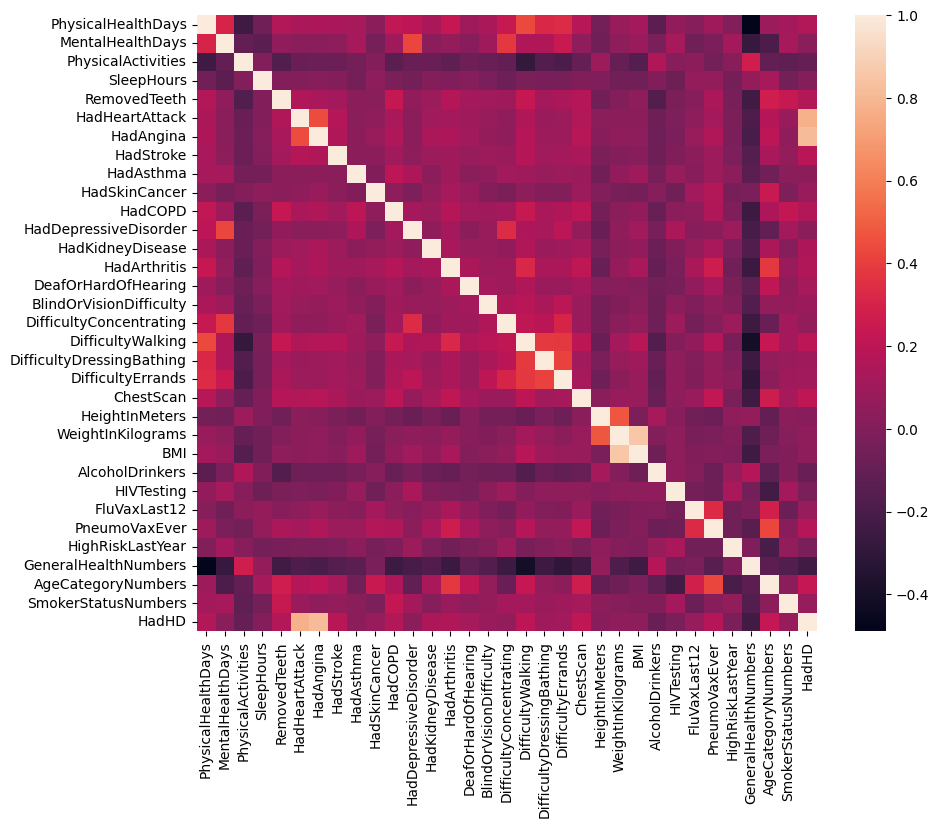

In [19]:
# calculate the correlation matrix on the numeric columns
corr = df_heart.corr()

# plot the heatmap
plt.figure(figsize=(10,8))
sn.heatmap(corr)

In [20]:
df_heart.corr()

,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,GeneralHealthNumbers,AgeCategoryNumbers,SmokerStatusNumbers,HadHD
PhysicalHealthDays,1.000000,0.306807,-0.240854,-0.056058,0.163790,0.133422,0.149133,0.128750,0.121714,0.030169,...,0.116899,-0.129347,0.055660,0.016741,0.101220,0.005226,-0.489084,0.089883,0.120182,0.164675
MentalHealthDays,0.306807,1.000000,-0.110528,-0.130095,0.047780,0.025888,0.024081,0.042096,0.123023,-0.039529,...,0.082174,-0.025979,0.124787,-0.057810,-0.025408,0.114207,-0.268538,-0.189783,0.125449,0.028251
PhysicalActivities,-0.240854,-0.110528,1.000000,0.003188,-0.170605,-0.083186,-0.078760,-0.079264,-0.043627,0.008104,...,-0.158914,0.157835,0.018491,0.030796,-0.051430,0.017671,0.278367,-0.107466,-0.121315,-0.095871
SleepHours,-0.056058,-0.130095,0.003188,1.000000,0.003373,0.003634,0.011541,0.008322,-0.045034,0.044078,...,-0.054744,-0.003553,-0.074161,0.066831,0.060522,-0.043794,0.068925,0.125791,-0.050516,0.008993
RemovedTeeth,0.163790,0.047780,-0.170605,0.003373,1.000000,0.153231,0.133089,0.119665,0.035526,0.023040,...,0.041022,-0.168243,-0.022943,0.018947,0.134716,-0.033331,-0.233034,0.269278,0.243458,0.166556
HadHeartAttack,0.133422,0.025888,-0.083186,0.003634,0.153231,1.000000,0.445902,0.177149,0.023759,0.049415,...,0.030409,-0.074176,-0.014565,0.045242,0.119965,-0.021129,-0.185681,0.172181,0.077334,0.774382
HadAngina,0.149133,0.024081,-0.078760,0.011541,0.133089,0.445902,1.000000,0.151894,0.034394,0.077625,...,0.040672,-0.067253,-0.024327,0.076018,0.157759,-0.027412,-0.201037,0.198908,0.051806,0.819639
HadStroke,0.128750,0.042096,-0.079264,0.008322,0.119665,0.177149,0.151894,1.000000,0.037820,0.039491,...,0.019933,-0.071149,-0.001634,0.035019,0.089092,-0.014099,-0.158907,0.132350,0.058880,0.189611
HadAsthma,0.121714,0.123023,-0.043627,-0.045034,0.035526,0.023759,0.034394,0.037820,1.000000,-0.001955,...,0.103217,-0.029864,0.072842,0.021648,0.086910,0.029292,-0.137204,-0.057836,0.028336,0.037173
HadSkinCancer,0.030169,-0.039529,0.008104,0.044078,0.023040,0.049415,0.077625,0.039491,-0.001955,1.000000,...,-0.046372,0.011494,-0.062701,0.114331,0.165642,-0.040907,-0.026501,0.244199,-0.013964,0.080344


Unlike other statistical tests in which correlation coefficients are very high and there are strong linear relationships between factors and outcomes, in healthcare it is important to recognize that likelihood of developing a disease comes from many existing factors compounded together. Just because somebody is overweight does not mean they will certainly develop heart disease, but their weight may still slightly increase the risk. When looking at risk factors individually, there might not appear to be a very strong correlation based on the calculated coefficient, but it is important to minimize every risk factor where we can.

We are not interested in correlations of risk factors to each other in this project, but only the correlations of risk factors to heart disease. So let's clean up the correlation matrix visually and only show the correlations to heart disease.

I will also discard the values 'HadAngina' and 'HadHeartAttack' since these are symptoms of heart disease, and discard the 'HadHD' value since this correlation is 1.0.
Below are the top positive and negative correlations with an absolute value of more than 0.04.

In [21]:
#Filter the correlation matrix by only the 'HadHD' column.
HadHD_desc = corr[['HadHD']].sort_values(by='HadHD', ascending=False)

#Remove the  'HadAngina','HadHeartAttack', 'HadHD' rows.
HadHD_new = HadHD_desc.drop(['HadHD','HadAngina','HadHeartAttack'], axis=0)

#Key indicators with the highest positive correlations with HadHD
HadHD_new [HadHD_new>0.04].sort_values(by='HadHD',ascending=False).dropna()


,HadHD
AgeCategoryNumbers,0.228816
ChestScan,0.214651
DifficultyWalking,0.199102
HadStroke,0.189611
PneumoVaxEver,0.168544
HadCOPD,0.168160
RemovedTeeth,0.166556
PhysicalHealthDays,0.164675
HadArthritis,0.162284
HadKidneyDisease,0.148357


In [22]:
#Key indicators with the highest negative correlations with HadHD
HadHD_new [HadHD_new<-0.04].sort_values(by='HadHD',ascending=False).dropna()

,HadHD
AlcoholDrinkers,-0.084421
PhysicalActivities,-0.095871
GeneralHealthNumbers,-0.228229


From this list of correlated risk factors, we can hypothesize several things.

History of a chest scan being associated with increased likelihood for heart disease may mean that whoever had went to get a chest scan had been experiencing symptoms of heart disease.

Arthritis, kidney disease, or COPD being associated with an increased likelihood for heart disease can mean that comorbidities increase risk of heart disease.

Difficulty with hearing or vision, and difficulty doing errands, walking, dressing or bathing can all signify advanced age or presence of comorbidities.


# Hypothesis 1: Pearson Correlation Test for General Health

Using Pearson correlation tests, we can determine if the p-value is small enough for a correlation to be significant.
I will use this test on GeneralHealthNumbers as I hypothesized that its correlation to heart disease prevalence will be significant.

In [23]:
#GeneralHealthNumbers
stats.pearsonr(df_heart['GeneralHealthNumbers'], df_heart['HadHD'])

PearsonRResult(statistic=-0.22822947198167004, pvalue=0.0)

The correlation coefficient is -0.23, and the p-value is close to 0.0. General health appears to be a statistically significant correlation to heart disease prevalence.

# Hypothesis 2: T-Test for BMI

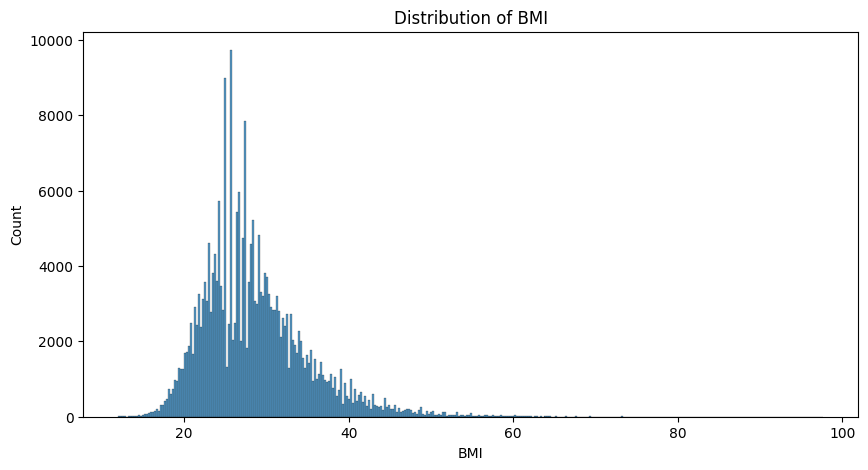

In [24]:
plt.figure(figsize=(10,5))
sn.histplot(df_heart['BMI'])
plt.title('Distribution of BMI');

The two samples to be used in this t-test are: average BMI of people with heart disease, and average BMI of people without heart disease.
The null hypothesis is that there is no difference between these two means.

Ho: p1 - p2 = 0

Ha: p1 - p2 ≠ 0

In [25]:
#Sample 1: Average BMI of people with heart disease.
HadHD1 = (df_heart['HadHD'] == 1)
BMI_HadHD1 = df_heart.iloc[HadHD1.values, [32]]
BMI_HadHD1.mean()

BMI    29.612653
dtype: float64

The average BMI of people with heart disease is 29.6.

In [26]:
#Sample 2: Average BMI of people without heart disease.
HadHD0 = (df_heart['HadHD'] == 0)
BMI_HadHD0 = df_heart.iloc[HadHD0.values, [32]]
BMI_HadHD0.mean()

BMI    28.577286
dtype: float64

The average BMI of people without heart disease is 28.6.

In [27]:
#T-Test comparing heart disease frequency of adults with BMI under 25 and adults with BMI 25 or over (overweight).
stats.ttest_ind(BMI_HadHD0, BMI_HadHD1)

TtestResult(statistic=array([-22.34100326]), pvalue=array([1.90364307e-110]), df=array([246011.]))

There is a difference of 22.3 standard deviations between these two means. The p-value is extremely small, implying that this is a real difference. Thus the null hypothesis is rejected. The average BMI changes significantly depending on whether heart disease is present or not.

In [28]:
#Confidence interval calculations
array_1= BMI_HadHD0
array_2=BMI_HadHD1

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(BMI_HadHD0['BMI'],BMI_HadHD1['BMI'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.942002842714193 and 1.1287314362563334.'

This means that with 95% confidence, there is a difference of between 0.94 and 1.13 in the average BMI when comparing those with heart disease and those without.

# Hypothesis 3: T-Test for Age Category

The two samples to be used in this t-test are: average age category of people with heart disease, and average age category of people without heart disease. The null hypothesis is that there is no difference between these two means.

Ho: p1 - p2 = 0

Ha: p1 - p2 ≠ 0

In [29]:
#Sample 1: Average age category number of people with heart disease.
HadHD1 = (df_heart['HadHD'] == 1)
Age_HadHD1 = df_heart.iloc[HadHD1.values, [41]]
Age_HadHD1.mean()


AgeCategoryNumbers    10.2729
dtype: float64

The average age category of people with heart disease is 10.3 (ages 65-69).

In [30]:
#Sample 2: Average age category number of people without heart disease.
HadHD0 = (df_heart['HadHD'] == 0)
Age_HadHD0 = df_heart.iloc[HadHD0.values, [41]]
Age_HadHD0.mean()


AgeCategoryNumbers    7.471874
dtype: float64

The average age category of people without heart disease is 7.5 (ages 50-54).

In [31]:
#T-Test comparing average ages of those with and without heart disease.
stats.ttest_ind(Age_HadHD0, Age_HadHD1)

TtestResult(statistic=array([-116.58439394]), pvalue=array([0.]), df=array([246011.]))

There is a difference of 116.6 standard deviations between these two means. The p-value is extremely small, implying that this is a real difference. Thus the null hypothesis is rejected. The average age changes significantly depending on whether heart disease is present or not.

In [32]:
#Confidence interval calculations
array_1= Age_HadHD0
array_2= Age_HadHD1

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(Age_HadHD0['AgeCategoryNumbers'],Age_HadHD1['AgeCategoryNumbers'])


'The difference in means at the 95% confidence interval (two-tail) is between 2.766593541533055 and 2.835458846522167.'

This means that with 95% confidence, there is a difference of between 2.77 and 2.84 in the average age category when comparing those with heart disease and those without.

# Visualizations of Heart Disease Frequency

Below are visualizations for the two factors that have highest correlation with developing heart disease: age and general health.

As you can see for general health, there is a clear increase in proportion of people with heart disease as the general health declines. It is without doubt that one's general health is something to be taken care of to minimize risk of heart disease.

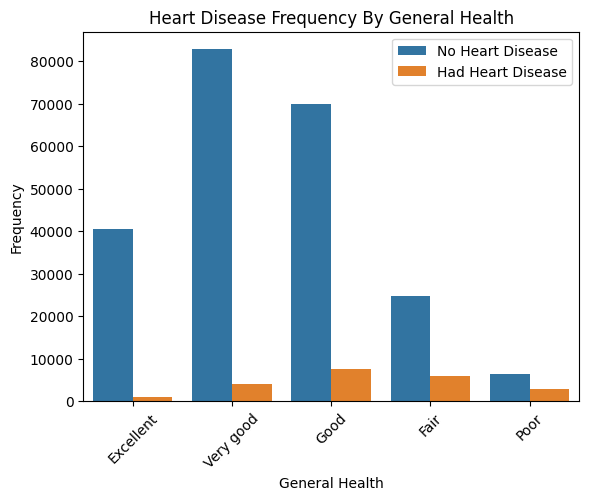

In [57]:
order_list = ['Excellent', 'Very good', 'Good','Fair','Poor']
sn.countplot(x='GeneralHealth', data=df_heart, hue='HadHD', order=order_list)
plt.title('Heart Disease Frequency By General Health')
plt.xlabel('General Health')
plt.legend(["No Heart Disease","Had Heart Disease"])
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


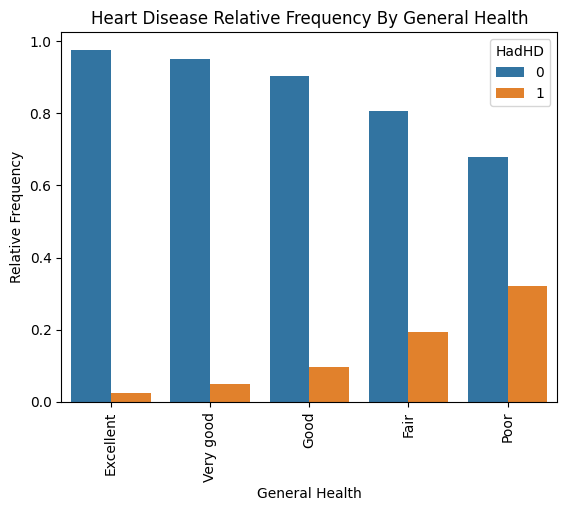

In [58]:
pct1 = (df_heart.groupby(['GeneralHealth','HadHD']).size() / df_heart.groupby(['GeneralHealth']).size()).reset_index().rename({0:'Percent'}, axis=1)
sn.barplot(x='GeneralHealth', hue='HadHD', y='Percent', data=pct1, order=order_list)
plt.title('Heart Disease Relative Frequency By General Health')
plt.xlabel('General Health')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

Similarly, there is a clear increase in proportion of people with heart disease as the age category increases. The older you are, the more likely heart disease may be present. The presence of other risk factors will compound this likelihood.

mentor notes:
- do chi square test
- relative frequency for graph (use instead of frequency for y axis)
- pick another dataset and owrk with that one instead (focus on visualization instead of EDA)
- work on regression models

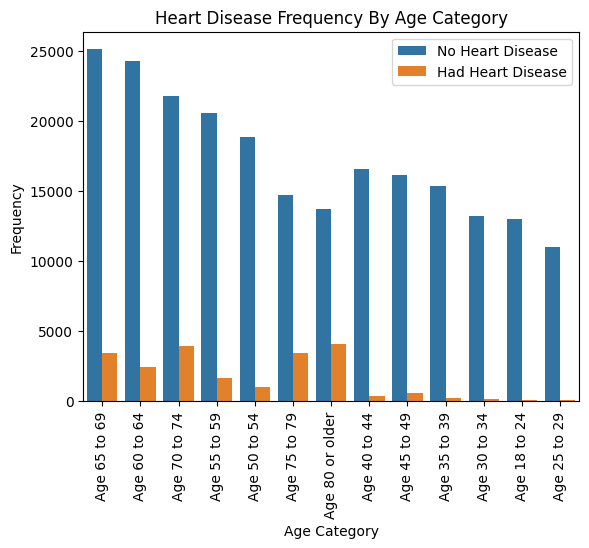

In [55]:
sn.countplot(x='AgeCategory', data=df_heart, hue='HadHD',  order = df_heart['AgeCategory'].value_counts().index)
plt.title('Heart Disease Frequency By Age Category')
plt.xlabel('Age Category')
plt.legend(["No Heart Disease","Had Heart Disease"])
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

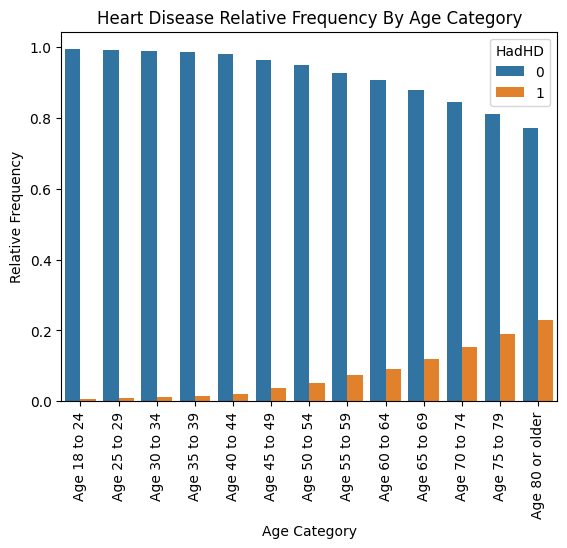

In [41]:
pct2 = (df_heart.groupby(['AgeCategory','HadHD']).size() / df_heart.groupby(['AgeCategory']).size()).reset_index().rename({0:'Percent'}, axis=1)
sn.barplot(x='AgeCategory', hue='HadHD', y='Percent', data=pct2)
plt.title('Heart Disease Relative Frequency By Age Category')
plt.xlabel('Age Category')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.show()

# Conclusion


Let's revisit the 3 hypotheses I stated in the beginning of this analysis.

1. Decline in general health will have a high correlation with heart disease prevalence. General health is a risk factor of heart disease.
2. Those with heart disease do not have a higher average BMI than those without heart disease.
3. Those with heart disease are not older on average than those without heart disease.

Through this analysis, I was able to come to three main conclusions.
General health is a significant risk factor of heart disease and has an inverse correlation with heart disease prevalence. The worse one's general health is, the more likely they are to develop heart disease.

Those with heart disease have a statistically significant higher average BMI than those without, and so I was able to reject the null hypothesis. BMI is therefore a risk factor of heart disease and in order to minimize the risk of heart disease it is recommended to maintain a healthy weight for one's height.

Those with heart disease are on average older than those without heart disease, and so I was able to reject the null hypothesis. Age is a risk factor of heart disease. Therefore, as one grows older, it becomes more important to take care of health and minimize other risk factors of heart disease by making healthy lifestyle choices.

Many sectors of the population will find my findings valuable such as healthcare providers, insurance companies, as well as the general population. Healthcare providers will be able to better advise on healthy lifestyle choices and ways to prevent heart disease. Insurance companies can use the findings to be aware of what key indicators to screen for when offering certain types of insurance such as life insurance and health insurance. The general population, particularly older adults, will be better informed on their own health and risks.

As I continually improve my data science and analytics expertise, I will aim to continually uncover valuable healthcare insights through patterns in data.
